# PP2 - Parte 2

## Notebook do exercício prático 2, Parte 2

* **UEA - Universidade do Estado do Amazonas**
* **EST - Escola Superior de Tecnologia**
* **Matéria de Redes Neurais**
* **Professora Elloá Guedes**
* **Repositório:** https://github.com/levidasilvalima/RNA-PP2

### Autores
* Ian Gustavo Alves Pessoa Silva - 1715080288  
* William Azevedo da Silva - 1615080226  
* Daniel Akio Chen - 1715080253  
* Levi da Silva Lima - 1615080131

## Import das bibliotecas

In [ ]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Import do arquivo a ser usado

In [ ]:
# dados_brutos = np.fromfile('./data2.txt')
dados_brutos = np.fromfile('/content/drive/My Drive/Colab Notebooks/data2.txt')


## Organização dos dados

In [ ]:
dados = dados_brutos.reshape((600,3))
dados = dados.transpose()

vetor1 = np.array(dados[0])
vetor2 = np.array(dados[1])
vetor_resposta = np.array(dados[2])
x0 = -1


## Inicialização das configurações a serem usadas

In [ ]:
# Distribuição uniforme aleatório dos pesos,
# Produto cartesiano a ser feito
pes = np.array([0.4, 0.1, 0.01])
aleatorio = np.array([[-100,100], [-1, 1], [-0.5, 0.5]])

# Vetores vazios que serão adicionados
configuracoes = np.array([]).reshape(0, 2)
vetor_peso = np.empty([9, 3])

for i in range(3):
    for j in range(3):
        config = aleatorio[i] * pes[j] # Produto cartesiano
        # print(config)

        # Adicionar ao vetor de configurações possíveis
        configuracoes = np.vstack((configuracoes, config))

        #Adicionar ao vetor de pesos aleatórios
        # vetor_peso = np.vstack((vetor_peso, np.random.uniform(config[0], config[1], 3)))

print("Configurações: \n", configuracoes)
# print("Pesos: ", vetor_peso)

Configurações: 
 [[-4.e+01  4.e+01]
 [-1.e+01  1.e+01]
 [-1.e+00  1.e+00]
 [-4.e-01  4.e-01]
 [-1.e-01  1.e-01]
 [-1.e-02  1.e-02]
 [-2.e-01  2.e-01]
 [-5.e-02  5.e-02]
 [-5.e-03  5.e-03]]


## Função de ativação

In [ ]:
#Função de ativação tipo degrau, com v = 0
def funcao_ativacao(saida):
    if saida >= 0:
        return 1
    else:
        return 0

## Principal - Aprendizado

In [ ]:
res_temp = 0                                          # Int temporário que vai guardar o res para funcao de ativacao
vetor_final = np.empty(600)                           # Vetor que será comparado com o resultado

n = 0.1                                               # Taxa de aprendizado
mudanca_peso = 0                                      # N de ajustes de peso
mudanca_total = 0                                     # N total de ajustes de peso
epoca = 0                                             # Epocas de ajuste

vetor_epoca = np.zeros([9, 100], dtype=int)           # Vetor das epocas
vetor_mudanca_peso = np.zeros([9, 100], dtype=int)    # Vetor dos ajustes totais

fa = 0              # Funcao de ativacao

# No caso do pp2, vai repetir 9 vezes
for possibilidades in range(len(configuracoes)):

    #Repetir 100 vezes para gerar dados
    for instancia in range(100):

        vetor_peso[possibilidades] = np.random.uniform(configuracoes[possibilidades][0], configuracoes[possibilidades][1], 3) 

        #Ele só para quando o vetor de respostas for igual ao vetor final
        while(True):

            #Repetir pela quantidade de vezes que tiver nos dados
            for i in range(len(dados[0])):

                # Soma dos produtos
                vetor_res_temp = (x0 * vetor_peso[possibilidades][0]) + (vetor1[i] * vetor_peso[possibilidades][1]) + (vetor2[i] * vetor_peso[possibilidades][2])

                # funcao de ativacao
                fa = funcao_ativacao(vetor_res_temp)

                vetor_final[i] = fa

                if (fa != vetor_resposta[i]): #Se estiver errado

                    #Erro é (esperado - funcao ativacao)
                    erro = vetor_resposta[i] - fa

                    valor_anterior = np.array([x0, vetor1[i], vetor2[i]])
                    #Ajuste de peso
                    vetor_peso[possibilidades] = vetor_peso[possibilidades] + (n*erro*valor_anterior)

                    #Adicionar quantidade de mudanças totais
                    vetor_mudanca_peso[possibilidades][instancia] += 1

            #Adicionar quantas epocas houveram
            vetor_epoca[possibilidades][instancia] += 1

            if((vetor_resposta == vetor_final).all()):
                break


print("ACABOU!")

ACABOU!


## Plot do gráfico

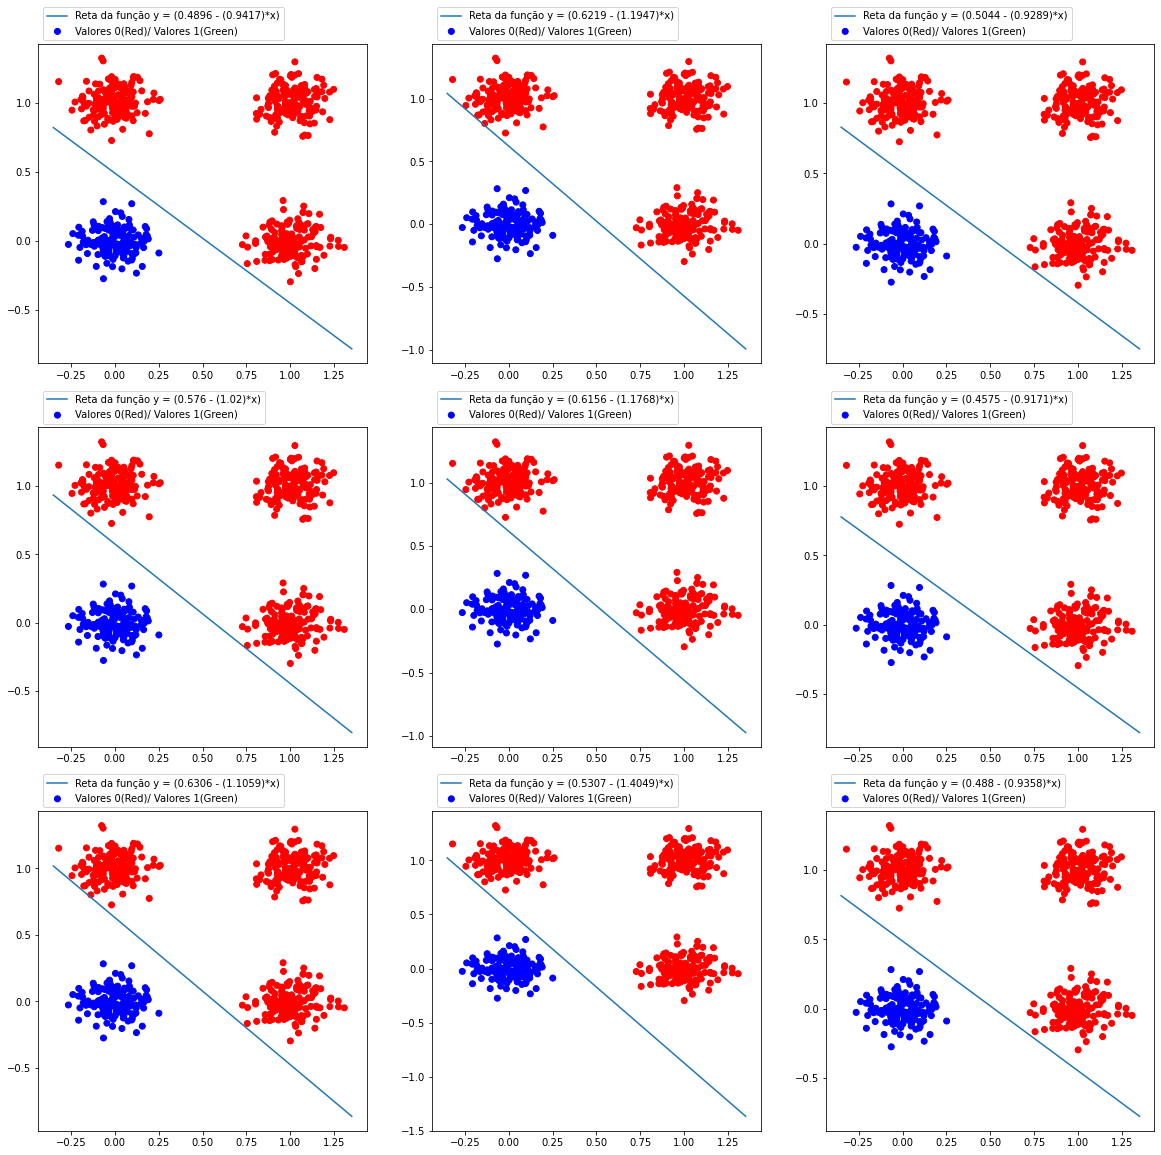

In [162]:
cor = np.where(vetor_resposta == 0, "red", "blue")

for i in range (9):
  funcao_a = round(vetor_peso[i][0]/vetor_peso[i][2], 4)
  funcao_b = round(vetor_peso[i][1]/vetor_peso[i][2], 4)

  x = np.linspace(-0.35,1.35)
  y = funcao_a - funcao_b * x

  plt.subplot(3, 3, i+1)
  plt.scatter(vetor1, vetor2, c=cor, label = "Valores 0(Red)/ Valores 1(Green)")
  plt.plot(x, y, label = "Reta da função y = ({} - ({})*x)".format(funcao_a, funcao_b))
  plt.rcParams["figure.figsize"] = (20, 20)
  plt.legend(loc="upper left", bbox_to_anchor=(0, 1.13))

## Calculo da Média e Desvio padrão dos ajustes e épocas

In [ ]:
# Media e desvio padrao dos ajustes
ajuste_vetor_medias = np.zeros(9)
ajuste_vetor_desvio_padrao = np.empty(9)

#Media e desvio padrao da epoca
epoca_vetor_medias = np.empty(9)
epoca_vetor_desvio_padrao = np.empty(9)

for i in range(len(vetor_epoca)):
    ajuste_vetor_medias[i] = np.mean(vetor_mudanca_peso[i])
    ajuste_vetor_desvio_padrao[i] = np.std(vetor_mudanca_peso[i])

    epoca_vetor_medias[i] = np.mean(vetor_epoca[i])
    epoca_vetor_desvio_padrao[i] = np.std(vetor_epoca[i])

## Table de Média e Desvio padrão dos ajustes e épocas

In [ ]:
from prettytable import PrettyTable

# Cria a tabela
x = PrettyTable(["Configuração", "Média de épocas", "Média de ajustes", 
                 "Desvio de épocas", "Desvio de ajustes"])

x.padding_width = 1

for i in range(len(epoca_vetor_medias)):
  x.add_row([configuracoes[i], round(epoca_vetor_medias[i]), 
             round(ajuste_vetor_medias[i]), round(epoca_vetor_desvio_padrao[i],4), 
             round(ajuste_vetor_desvio_padrao[i],4)])

print(x)

+-----------------+-----------------+------------------+------------------+-------------------+
|   Configuração  | Média de épocas | Média de ajustes | Desvio de épocas | Desvio de ajustes |
+-----------------+-----------------+------------------+------------------+-------------------+
|   [-40.  40.]   |       32.0      |      536.0       |     22.8861      |      327.6233     |
|   [-10.  10.]   |       12.0      |      177.0       |      5.6535      |      91.0419      |
|    [-1.  1.]    |       6.0       |       22.0       |      2.3171      |      12.4912      |
|   [-0.4  0.4]   |       6.0       |       15.0       |      2.1606      |       6.6135      |
|   [-0.1  0.1]   |       6.0       |       12.0       |      2.1807      |       5.2556      |
|  [-0.01  0.01]  |       5.0       |       9.0        |      0.4695      |       0.6633      |
|   [-0.2  0.2]   |       6.0       |       11.0       |      1.6064      |       4.6654      |
|  [-0.05  0.05]  |       6.0       |   

# Discução sobre o obtido
#### É possivel perceber que para o algoritmo apresentado, e para as configurações obtidas, houve uma certa discrepância entre as diferentes ocasiões de teste (mesmo que todas tenham levado a convergência). Pode-se notar que a configuração: `[-0.005  0.005]` houve a menor media de epocas e ajustes que indicam uma possivel melhor escolha para o treinamento e tambem possui os menores valores para os desvios padrao indicando que os valores testados não se diferem tando assim da media apresentada. No entando sabe-se que para uma amostra linearmente separavel o resultado sempre convirgirá sendo assim equivalentes todos os resutados. Por fim apenas para fins exemplicativos aponta-se a configuração `[-40.  40.]` como sendo a mais "ruim" e a `[-0.005  0.005]` mais "adequada".
